# Auswertungsprogramm für das Abschlussportfolio zum Modul "Talentförderung in den Naturwissenschaften" im Praxissemester 2024/2025
Das vorliegende Notebook soll eine dokumentierte Version des genutzten Auswertungsprogramm darstellen. Die zugrundeliegenden Daten wurden vom LeOnie-Programm als CSV-Import heruntergeladen und hier eingelesen. Es folgen eine Datenaufbereitung sowie verschiedene Auswertungen, um interessante Ergebnisse aus den Daten zu ziehen.

In [2]:
# import necessary libs
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plot_likert as pl

Wir erstellen unseren Panda DataFrame df, indem wir die Rohdaten aus dem CSV-Export einlesen. LeOnie generiert dabei eine nicht wohlgeformte Datei, sodass einige Aufbereitungsarbeiten anstehen.

Nach dem Import werden zunächst die Fragen durch kompaktere Codewörter ersetzt.

In [3]:
# import csv data. LeOnie uses ; as delimeter, and outputs a malformed file (with delimiters at the end of each line). Therefore we force to _not_ use the first col als index
df = pd.read_csv("arbeitskopie.csv", sep=';',header=0,index_col=False)

# rename the headers to something more useable. Use this dict later on to regain the original question from the coded snippet
newNamesDict = {
    "(Teilnehmer-ID)":'teilnehmer_id',
    "1. In welcher Jahrgangsstufe befindest du dich zurzeit?": "jahrgangsstufe",
    "2. Hast du an deiner Schule bereits am Dreht�r-Modell teilgenommen?": 'drehtuer',
    "3. Hast du schonmal etwas von einem Sch�lerwettbewerb geh�rt?": 'kenntnis_wettbewerb_gesamt',
    "3. Hast du schonmal etwas von einem Sch�lerwettbewerb geh�rt?: K�nguru der Mathematik _UNTER_": 'kenntnis_kaenguru',
    "3. Hast du schonmal etwas von einem Sch�lerwettbewerb geh�rt?: Informatikbiber _UNTER_": 'kenntnis_infobiber',
    "3. Hast du schonmal etwas von einem Sch�lerwettbewerb geh�rt?: internationale Physik-, Chemie- oder Bioolympiade (IPhO, IChO, IBO) _UNTER_": 'kenntnis_scienceolympiade',
    "3. Hast du schonmal etwas von einem Sch�lerwettbewerb geh�rt?: Internationale Junior Science Olympiade (IJSO) _UNTER_":'kenntnis_ijso',
    "3. Hast du schonmal etwas von einem Sch�lerwettbewerb geh�rt?: Jugend forscht _UNTER_":'kenntnis_jugendforscht',
    "3. Hast du schonmal etwas von einem Sch�lerwettbewerb geh�rt?: Sonstige, und zwar: _UNTER_":'kenntnis_sonstige_wettbewerbe',
    "3. Hast du schonmal etwas von einem Sch�lerwettbewerb geh�rt?: Unterantwort: Sonstige, und zwar: _UNTERTEXT_":'kenntnis_sonstige_wettbewerbe_text',
    "4. Nimmst du an einem Sch�lerwettbewerb teil oder hast du schonmal an einem Wettbewerb teilgenommen?":'teilnahme_wettbewerb_gesamt',
    "4. Nimmst du an einem Sch�lerwettbewerb teil oder hast du schonmal an einem Wettbewerb teilgenommen?: K�nguru der Mathematik _UNTER_":'teilnahme_kaenguru',
    "4. Nimmst du an einem Sch�lerwettbewerb teil oder hast du schonmal an einem Wettbewerb teilgenommen?: Informatikbiber _UNTER_":'teilnahme_infobiber',
    "4. Nimmst du an einem Sch�lerwettbewerb teil oder hast du schonmal an einem Wettbewerb teilgenommen?: internationale Physik-, Chemie- oder Bioolympiade (IPhO, IChO, IBO) _UNTER_":'teilnahme_scienceolympiade',
    "4. Nimmst du an einem Sch�lerwettbewerb teil oder hast du schonmal an einem Wettbewerb teilgenommen?: Internationale Junior Science Olympiade (IJSO) _UNTER_":'teilnahme_ijso',
    "4. Nimmst du an einem Sch�lerwettbewerb teil oder hast du schonmal an einem Wettbewerb teilgenommen?: Jugend forscht _UNTER_":'teilnahme_jugendforscht',
    "4. Nimmst du an einem Sch�lerwettbewerb teil oder hast du schonmal an einem Wettbewerb teilgenommen?: Sonstige, und zwar: _UNTER_":'teilnahme_sonstige_wettbewerbe',
    "4. Nimmst du an einem Sch�lerwettbewerb teil oder hast du schonmal an einem Wettbewerb teilgenommen?: Unterantwort: Sonstige, und zwar: _UNTERTEXT_":'teilnahme_sonstige_wettbewerbe_text',
    "5. Kennst du F�rderangebote au�erhalb der Schule?":'kenntnis_ausserschule_gesamt',
    "5. Kennst du F�rderangebote au�erhalb der Schule?: Junior- oder Sch�lerakademie _UNTER_":'kenntnis_akademie',
    "5. Kennst du F�rderangebote au�erhalb der Schule?: Enrichtment-Programm _UNTER_":'kenntnis_enrichment',
    "5. Kennst du F�rderangebote au�erhalb der Schule?: Sch�lerforschungszentrum (Sfz) _UNTER_":'kenntnis_sfz',
    "5. Kennst du F�rderangebote au�erhalb der Schule?: Sonstige, und zwar: _UNTER_":'kenntnis_sonstige_ausserschule',
    "5. Kennst du F�rderangebote au�erhalb der Schule?: Unterantwort: Sonstige, und zwar: _UNTERTEXT_":'kenntnis_sonstige_ausserschule_text',
    "6. Nimmst du anderen F�rderangeboten au�erhalb der Schule teil oder hast du in der Vergangenheit teilgenommen?":'teilnahme_ausserschule_gesamt',
    "6. Nimmst du anderen F�rderangeboten au�erhalb der Schule teil oder hast du in der Vergangenheit teilgenommen?: Junior- oder Sch�lerakademie _UNTER_":'teilnahme_akademie',
    "6. Nimmst du anderen F�rderangeboten au�erhalb der Schule teil oder hast du in der Vergangenheit teilgenommen?: Enrichtment-Programm _UNTER_":'teilnahme_enrichment',
    "6. Nimmst du anderen F�rderangeboten au�erhalb der Schule teil oder hast du in der Vergangenheit teilgenommen?: Sch�lerforschungszentrum (Sfz) _UNTER_":'teilnahme_sfz',
    "6. Nimmst du anderen F�rderangeboten au�erhalb der Schule teil oder hast du in der Vergangenheit teilgenommen?: Sonstige, und zwar: _UNTER_":'teilnahme_sonstige_ausserschule',
    "6. Nimmst du anderen F�rderangeboten au�erhalb der Schule teil oder hast du in der Vergangenheit teilgenommen?: Unterantwort: Sonstige, und zwar: _UNTERTEXT_":'teilnahme_sonstige_ausserschule_text',
    "7. Wie hast du von dem Angebot erfahren?: Plakat-Aushang in der Schule":'hinweis_wettbewerb_plakat',
    "7. Wie hast du von dem Angebot erfahren?: Meine Lehrkraft hat mich darauf hingewiesen":'hinweis_wettbewerb_lehrkraft',
    "7. Wie hast du von dem Angebot erfahren?: Eltern/Familie haben mich darauf hingewiesen":'hinweis_wettbewerb_eltern',
    "7. Wie hast du von dem Angebot erfahren?: Freunde/ Mitsch�ler/ Mitsch�lerinnen haben mir davon erz�hlt":'hinweis_wettbewerb_freunde',
    "7. Wie hast du von dem Angebot erfahren?: Sonstiges, und zwar:":'hinweis_wettbewerb_sonstiges',
    "7. Wie hast du von dem Angebot erfahren?: Sonstiges, und zwar: _TEXT_":'hinweis_wettbewerb_sonstiges_text',
    "8. Das Angebot hat mein Interesse gef�rdert.":'likert_wettbewerb_interesse',
    "9. Ich f�hlte mich �ber das Angebot gut informiert.":'likert_wettbewerb_informiert',
    "10. Ich w�rde gerne mehr �ber das Angebot erfahren.":'likert_wettbewerb_mehrerfahren',
    "11. Das Angebot hat mich �berfordert":'likert_wettbewerb_ueberforderung',
    "12. Ich habe Lust bekommen, mich auch nach der Schule mit dem Angebot zu besch�ftigen.":'likert_wettbewerb_nachderSchule',
    "13. Mich hat das Angebot abgeschreckt.":'likert_wettbewerb_abgeschreckt',
    "14. Wie hast du von dem Angebot erfahren?: Plakat-Aushang in der Schule":'hinweis_ausserschule_plakat',
    "14. Wie hast du von dem Angebot erfahren?: Meine Lehrkraft hat mich darauf hingewiesen":'hinweis_ausserschule_lehrkraft',
    "14. Wie hast du von dem Angebot erfahren?: Eltern/Familie haben mich darauf hingewiesen":'hinweis_ausserschule_eltern',
    "14. Wie hast du von dem Angebot erfahren?: Freunde/ Mitsch�ler/ Mitsch�lerinnen haben mir davon erz�hlt":'hinweis_ausserschule_freunde',
    "14. Wie hast du von dem Angebot erfahren?: Sonstiges, und zwar:":'hinweis_ausserschule_sonstiges',
    "14. Wie hast du von dem Angebot erfahren?: Sonstiges, und zwar: _TEXT_":'hinweis_ausserschule_sonstiges_text',
    "15. Das Angebot hat mein Interesse gef�rdert.":'likert_ausserschule_interesse',
    "16. Ich f�hlte mich �ber das Angebot gut informiert.":'likert_ausserschule_informiert',
    "17. Ich w�rde gerne mehr �ber das Angebot erfahren.":'likert_ausserschule_mehrerfahren',
    "18. Das Angebot hat mich �berfordert":'likert_ausserschule_ueberforderung',
    "19. Ich habe Lust bekommen, mich auch nach der Schule mit dem Angebot zu besch�ftigen.":'likert_ausserschule_nachderSchule',
    "20. Mich hat das Angebot abgeschreckt.": 'likert_ausserschule_abgeschreckt'}
oldNamesDict = {v: k for k, v in newNamesDict.items()}
df.rename(columns = newNamesDict, inplace=True)
df.head(5)

C:\Users\banan\AppData\Local\Temp\ipykernel_33000\1754175034.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv("arbeitskopie.csv", sep=';',header=0,index_col=False)


,teilnehmer_id,jahrgangsstufe,drehtuer,kenntnis_wettbewerb_gesamt,kenntnis_kaenguru,kenntnis_infobiber,kenntnis_scienceolympiade,kenntnis_ijso,kenntnis_jugendforscht,kenntnis_sonstige_wettbewerbe,...,hinweis_ausserschule_eltern,hinweis_ausserschule_freunde,hinweis_ausserschule_sonstiges,hinweis_ausserschule_sonstiges_text,likert_ausserschule_interesse,likert_ausserschule_informiert,likert_ausserschule_mehrerfahren,likert_ausserschule_ueberforderung,likert_ausserschule_nachderSchule,likert_ausserschule_abgeschreckt
0,5,Q1-Q2,Nein,1.0,K�nguru der Mathematik,NaN,NaN,NaN,Jugend forscht,"Sonstige, und zwar:",...,NaN,NaN,NaN,NaN,stimme eher nicht zu,stimme eher zu,stimme eher nicht zu,stimme nicht zu,stimme nicht zu,stimme nicht zu
1,6,Q1-Q2,Nein,1.0,K�nguru der Mathematik,Informatikbiber,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,Q1-Q2,Nein,1.0,K�nguru der Mathematik,NaN,NaN,NaN,Jugend forscht,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Q1-Q2,Nein,1.0,K�nguru der Mathematik,NaN,NaN,NaN,Jugend forscht,"Sonstige, und zwar:",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,Q1-Q2,"Ja, habe in Vergangenheit daran teilgenommen",1.0,K�nguru der Mathematik,NaN,"internationale Physik-, Chemie- oder Bioolympi...",NaN,NaN,"Sonstige, und zwar:",...,Eltern/Familie haben mir das gezeigt,NaN,NaN,NaN,stimme zu,stimme eher nicht zu,stimme eher nicht zu,stimme nicht zu,stimme eher nicht zu,stimme nicht zu


Für eine einfache Auswertung können die Antworten über die Zeilen hinweg summiert und ausgegeben werden. Dafür reicht die einfache Ausgabezeile, wobei der Spaltenname beliebig geändert werden kann.

In [4]:
df['jahrgangsstufe'].value_counts()

df.groupby(['jahrgangsstufe', 'drehtuer']).size()

# df['kenntnis_wettbewerb_gesamt'].value_counts()

df['teilnahme_sfz'].value_counts()

df['hinweis_wettbewerb_plakat'].value_counts()

hinweis_wettbewerb_plakat
Plakat-Aushang in der Schule    43
Name: count, dtype: int64

Es folgt eine Aufbereitung der erhaltenen Daten: Sämtliche Antworten werden sinnvoll in numerische Codes übersetzt, um eine statistische Auswertung zu vereinfachen.

In [5]:
# replace NaN with 0
df.fillna(0, inplace=True)

# code jahrgangsstufe
df.jahrgangsstufe = df.jahrgangsstufe.replace(['9.-10. Klasse','E-Phase','Q1-Q2'],[0,1,2])

# code drehtür 
df.drehtuer = df.drehtuer.replace(['Nein', 'Ja', 'Ja, habe in Vergangenheit daran teilgenommen','Ja, nehme gerade daran teil und habe in Vergangenheit daran teilgenommen'],[0,1,2,3])

# code the yes/no items in kenntnis/teilnahme/hinweis with True for "Ja" and False for "Nein"
yes_no_items = ['kenntnis_kaenguru', 'kenntnis_infobiber','kenntnis_scienceolympiade', 'kenntnis_ijso', 'kenntnis_jugendforscht','kenntnis_sonstige_wettbewerbe',
                'teilnahme_kaenguru','teilnahme_infobiber', 'teilnahme_scienceolympiade', 'teilnahme_ijso', 'teilnahme_jugendforscht','teilnahme_sonstige_wettbewerbe',
                'kenntnis_akademie', 'kenntnis_enrichment', 'kenntnis_sfz','kenntnis_sonstige_ausserschule',
                'teilnahme_akademie','teilnahme_enrichment', 'teilnahme_sfz','teilnahme_sonstige_ausserschule',
                'hinweis_wettbewerb_plakat','hinweis_wettbewerb_lehrkraft', 'hinweis_wettbewerb_eltern','hinweis_wettbewerb_freunde', 'hinweis_wettbewerb_sonstiges',
                'hinweis_ausserschule_plakat','hinweis_ausserschule_lehrkraft', 'hinweis_ausserschule_eltern', 'hinweis_ausserschule_freunde', 'hinweis_ausserschule_sonstiges']
for item_name in yes_no_items:
       df.loc[df[item_name] != 0, item_name] = 1 # just replace the text inputs with 1, as the 0s are already correctly placed

# turning to boolean
df[yes_no_items] = df[yes_no_items].astype(bool)

# code the teilnahme_gesamt and kenntnis_gesamt columns in the same fashion, but replace "Ja, und zwar:" with True and "Nein" with False
gesamt_items = ['teilnahme_wettbewerb_gesamt','teilnahme_ausserschule_gesamt']
for item_name in gesamt_items:
       # this is very ugly, but I do not get paid enough for this portfolio
       df.loc[df[item_name] == 'Nein', item_name] = 0 
       df.loc[df[item_name] == 'Ja, und zwar:', item_name] = 1
# turning to boolean
df[gesamt_items] = df[gesamt_items].astype(bool)

df.head(5)

# code the likert items to 1-5
likert_items = ['likert_wettbewerb_interesse','likert_wettbewerb_informiert', 'likert_wettbewerb_mehrerfahren','likert_wettbewerb_ueberforderung', 'likert_wettbewerb_nachderSchule','likert_wettbewerb_abgeschreckt',
                'likert_ausserschule_interesse','likert_ausserschule_informiert', 'likert_ausserschule_mehrerfahren','likert_ausserschule_ueberforderung','likert_ausserschule_nachderSchule','likert_ausserschule_abgeschreckt']
# for item_name in likert_items:
#        df.loc[df[item_name] == 'stimme nicht zu', item_name] = '1'
#        df.loc[df[item_name] == 'stimme eher nicht zu', item_name] = '2'
#        df.loc[df[item_name] == 'stimme eher zu', item_name] = '3'
#        df.loc[df[item_name] == 'stimme zu', item_name] = '4'

hinweis_items = ['hinweis_wettbewerb_plakat','hinweis_wettbewerb_lehrkraft', 'hinweis_wettbewerb_eltern', 'hinweis_wettbewerb_freunde', 'hinweis_wettbewerb_sonstiges',
                 'hinweis_ausserschule_plakat', 'hinweis_ausserschule_lehrkraft', 'hinweis_ausserschule_eltern','hinweis_ausserschule_freunde', 'hinweis_ausserschule_sonstiges']

# for item_name in hinweis_items:
#        df.loc[df[item_name] != 0, item_name] = 1 # just replace the text inputs with 1, as the 0s are already correctly placed



C:\Users\banan\AppData\Local\Temp\ipykernel_33000\1625050395.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.jahrgangsstufe = df.jahrgangsstufe.replace(['9.-10. Klasse','E-Phase','Q1-Q2'],[0,1,2])
C:\Users\banan\AppData\Local\Temp\ipykernel_33000\1625050395.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.drehtuer = df.drehtuer.replace(['Nein', 'Ja', 'Ja, habe in Vergangenheit daran teilgenommen','Ja, nehme gerade daran teil und habe in Vergangenheit daran teilgenommen'],[0,1,2,3])


Zur Übersicht über die Kenntnis- sowie Teilnahme von den Angeboten werden mehrere Barplots erstellt. Hierfür benötigt es ein neues Dataframe als Submenge der Erhebungsdaten, welches nur die relevanten Informationen beinhaltet. Über ein neues Dictionary werden die Keywords (welche vorhin mega aufwändig erstellt wurden) in nettere Label übersetzt, damit man die resultierende Grafik auch präsentieren kann.

C:\Users\banan\AppData\Local\Temp\ipykernel_33000\4236444681.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plot_df = df[yes_no_items].apply(pd.value_counts).fillna(0).astype(int).rename(columns = dict_nice_names).melt(ignore_index = False)


Text(0.2, 1.0, 'Hast du schonmal etwas von einem Schülerwettbewerb gehört? Ja, und zwar von...')

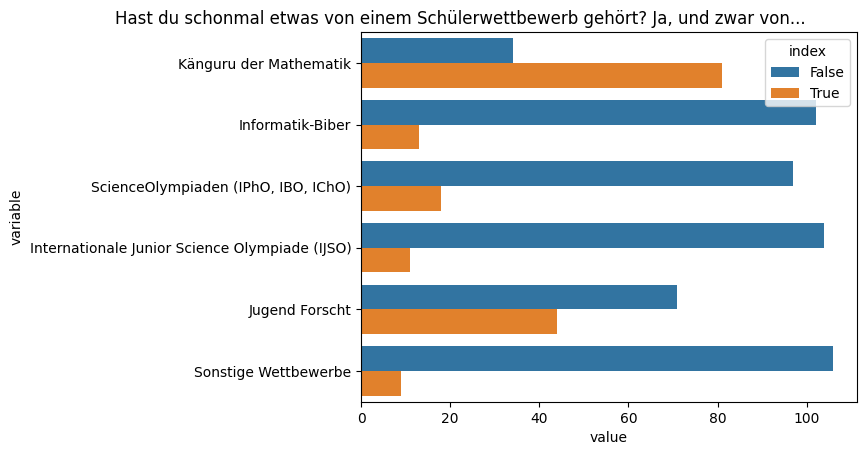

In [26]:
dict_nice_names = {'kenntnis_kaenguru': 'Känguru der Mathematik', 
                   'kenntnis_infobiber': 'Informatik-Biber',
                   'kenntnis_scienceolympiade': 'ScienceOlympiaden (IPhO, IBO, IChO)', 
                   'kenntnis_ijso': 'Internationale Junior Science Olympiade (IJSO)',
                   'kenntnis_jugendforscht': 'Jugend Forscht',
                   'kenntnis_sonstige_wettbewerbe': 'Sonstige Wettbewerbe',
                   'teilnahme_kaenguru': 'Känguru der Mathematik',
                    'teilnahme_infobiber': 'Informatik-Biber',
                    'teilnahme_scienceolympiade': 'ScienceOlympiaden (IPhO, IBO, IChO)',
                    'teilnahme_ijso': 'Internationale Junior Science Olympiade (IJSO)', 
                    'teilnahme_jugendforscht': 'Jugend Forscht',
                    'teilnahme_sonstige_wettbewerbe': 'Sonstige Wettbewerbe',
                'kenntnis_akademie': 'Schüler- oder Juniorakademie',
                 'kenntnis_enrichment': 'Enrichtment-Programm',
                  'kenntnis_sfz': 'Schülerforschungszentren (Sfz)',
                  'kenntnis_sonstige_ausserschule': 'Sonstige Angebote',
                'teilnahme_akademie': 'Schüler- oder Juniorakademie',
                'teilnahme_enrichment': 'Enrichtment-Programm',
                 'teilnahme_sfz' : 'Schülerforschungszentren (Sfz)',
                 'teilnahme_sonstige_ausserschule' : 'Sonstige Angebote',
                'hinweis_wettbewerb_plakat' : 'Plakataushang',
                'hinweis_wettbewerb_lehrkraft' : 'Hinweis durch die Lehrkraft',
                 'hinweis_wettbewerb_eltern' : 'Hinweis durch Eltern/Familie',
                 'hinweis_wettbewerb_freunde' : 'Hinweis durch Mitschüler:innen/Freunde',
                  'hinweis_wettbewerb_sonstiges': 'Sonstiges',
                'hinweis_ausserschule_plakat': 'Plakataushang',
                'hinweis_ausserschule_lehrkraft' : 'Hinweis durch die Lehrkraft',
                 'hinweis_ausserschule_eltern' : 'Hinweis durch Eltern/Familie', 
                 'hinweis_ausserschule_freunde': 'Hinweis durch Mitschüler:innen/Freunde',
                  'hinweis_ausserschule_sonstiges': 'Sonstiges'}

plot_df = df[yes_no_items].apply(pd.value_counts).fillna(0).astype(int).rename(columns = dict_nice_names).melt(ignore_index = False)
plot_df["index"] = plot_df.index

# plot_df
sns.barplot(plot_df.iloc[:12], y="variable", x="value", hue = "index", orient = "y")
plt.title('Hast du schonmal etwas von einem Schülerwettbewerb gehört? Ja, und zwar: ', x=0.2)

# sns.histplot(plot_df.iloc[:12], y="variable", x="value", hue = "index", multiple = "stack")


Text(0.2, 1.0, 'Nimmst du an einem Schülerwettbewerb teil [...]? Ja, und zwar...')

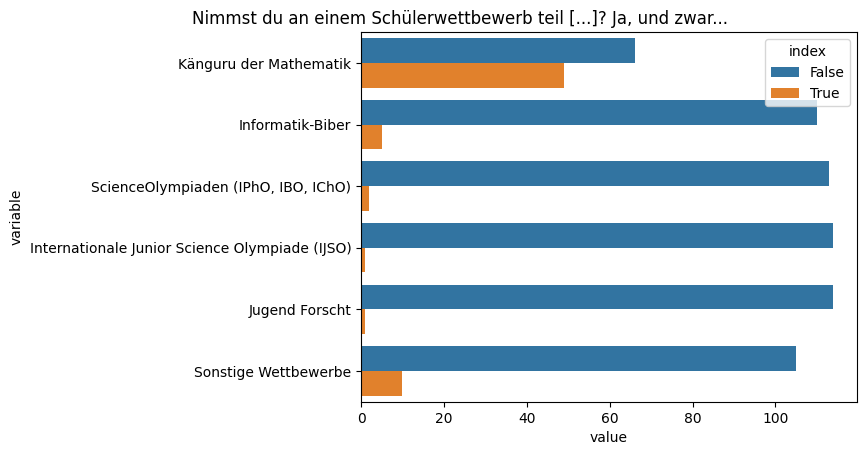

In [24]:
sns.barplot(plot_df.iloc[12:24], y="variable", x="value", hue = "index", orient = "y")
plt.title('Nimmst du an einem Schülerwettbewerb teil [...]? Ja, und zwar:', x=0.2)


Text(0.2, 1.0, 'Kennst du Förderangebote außerhalb der Schule? Ja, und zwar:')

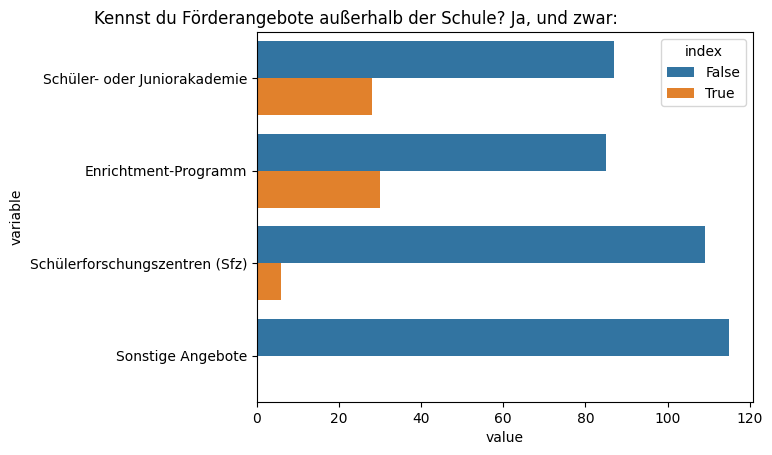

In [28]:

sns.barplot(plot_df.iloc[24:32], y="variable", x="value", hue = "index", orient = "y")
plt.title("Kennst du Förderangebote außerhalb der Schule? Ja, und zwar:", x =0.2)


Text(0.2, 1.0, 'Nimmst du an Förderangebote außerhalb der Schule teil[...]? Ja, und zwar:')

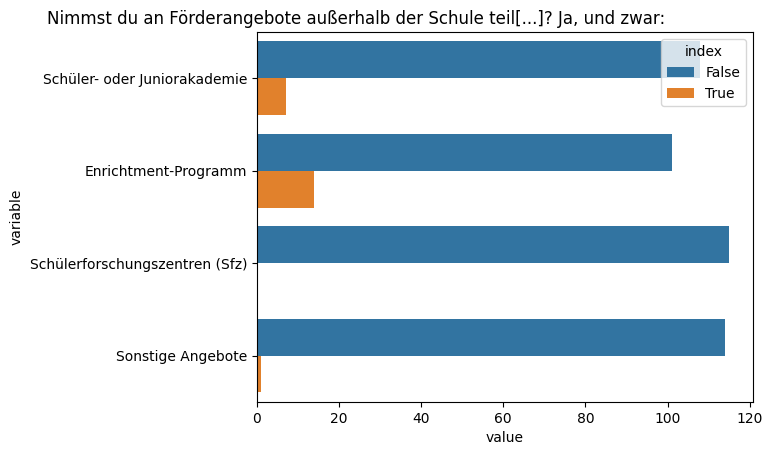

In [29]:

sns.barplot(plot_df.iloc[32:40], y="variable", x="value", hue = "index", orient = "y")
plt.title("Nimmst du an Förderangebote außerhalb der Schule teil[...]? Ja, und zwar:", x =0.2)

Die Items zur Kenntnis der einzelnen Angebote ("Wie hast du davon erfahren?") werden in ähnlichen Grafiken aufbereitet.

C:\Users\banan\AppData\Local\Temp\ipykernel_33000\88606584.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plot_df = df[hinweis_items].apply(pd.value_counts).fillna(0).astype(int).rename(columns = dict_nice_names).melt(ignore_index = False)


Text(0.2, 1.0, 'Wie hast du von dem Angebot [der Wettbewerbe] erfahren?')

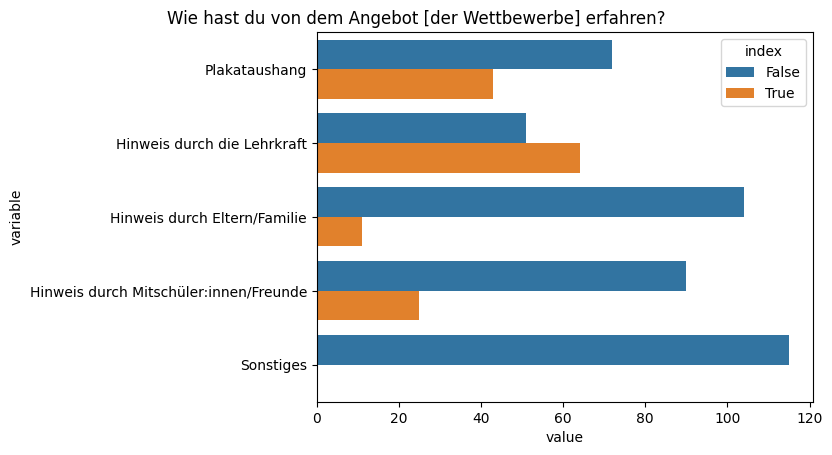

In [33]:
plot_df = df[hinweis_items].apply(pd.value_counts).fillna(0).astype(int).rename(columns = dict_nice_names).melt(ignore_index = False)

plot_df["index"] = plot_df.index

# plot_df
sns.barplot(plot_df.iloc[:10], y="variable", x="value", hue = "index", orient = "y")
# sns.histplot(plot_df.iloc[:12], y="variable", x="value", hue = "index", multiple = "stack")
plt.title("Wie hast du von dem Angebot [der Wettbewerbe] erfahren?", x = 0.2)


Text(0.2, 1.0, 'Wie hast du von dem [außerschulischem] Angebot erfahren?')

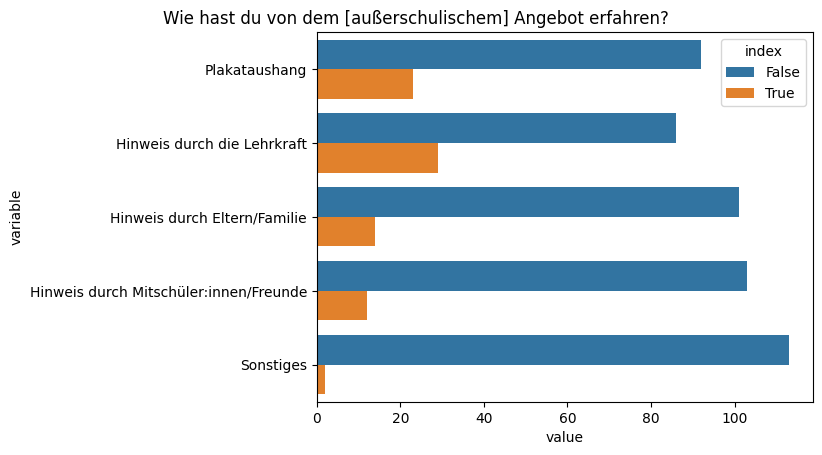

In [32]:

sns.barplot(plot_df.iloc[10:], y="variable", x="value", hue = "index", orient = "y")
plt.title("Wie hast du von dem [außerschulischem] Angebot erfahren?", x = 0.2)

In [140]:
plot_df.value_counts()

variable                        value  index
hinweis_ausserschule_eltern     14     True     1
                                101    False    1
hinweis_wettbewerb_sonstiges    0      True     1
hinweis_wettbewerb_plakat       72     False    1
                                43     True     1
hinweis_wettbewerb_lehrkraft    64     True     1
                                51     False    1
hinweis_wettbewerb_freunde      90     False    1
                                25     True     1
hinweis_wettbewerb_eltern       104    False    1
                                11     True     1
hinweis_ausserschule_sonstiges  113    False    1
                                2      True     1
hinweis_ausserschule_plakat     92     False    1
                                23     True     1
hinweis_ausserschule_lehrkraft  86     False    1
                                29     True     1
hinweis_ausserschule_freunde    103    False    1
                                12     True     1
hinwe

Für die Likert-skalierten Items soll ein stacked-barplot generiert werden. Dafür ist noch ein wenig Datenaufbereitung notwendig, da zum besseren Verständnis hier die ursprünglichen Itemnamen wieder eingeblendet werden sollen:

c:\Users\banan\AppData\Local\Programs\Python\Python312\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\banan\AppData\Local\Programs\Python\Python312\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


<Axes: xlabel='Number of Responses'>

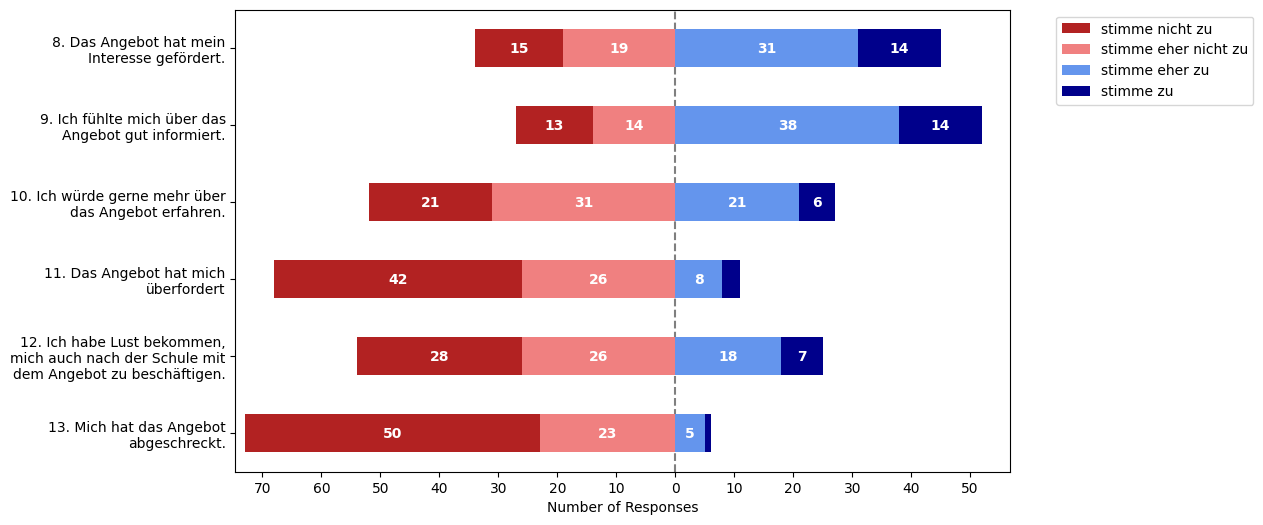

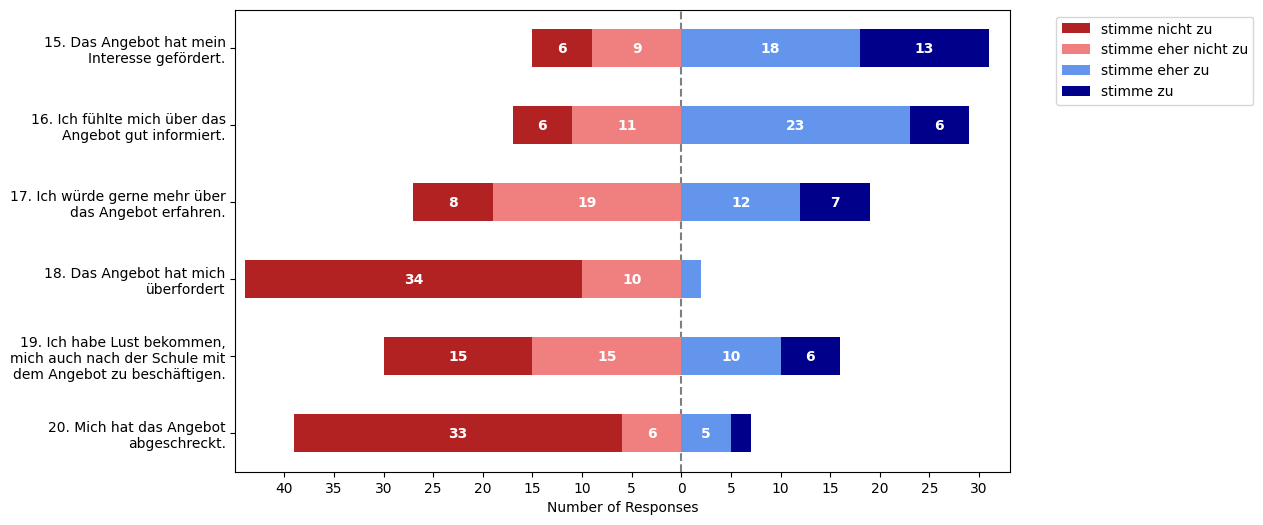

In [123]:
# likertplot_df = df[likert_items].apply(pd.value_counts).fillna(0).astype(int).melt(ignore_index = False)
funny_words_lookup = {
    'w�rde' : 'würde',
    'gef�rdert' : 'gefördert',
    'f�hlte' : 'fühlte',
    '�ber' : 'über',
    '�berfordert' : 'überfordert',
    'besch�ftigen' : 'beschäftigen'
}
def cleanupFunnyWords(column_name):
    for wrong_word, replacement in funny_words_lookup.items():
      column_name = column_name.replace(wrong_word, replacement)
    return column_name
likertplot_df = df[likert_items[:6]].replace(0,np.NaN).rename(columns = oldNamesDict).rename(columns = cleanupFunnyWords)
# likertplot_df.columns = likertplot_df.columns.str.replace(r"[�]", "ü", regex=True)
# likertplot_df
# likert_scale = likertplot_df['likert_wettbewerb_interesse'].unique()
likert_scale_with_ka = \
    ['stimme nicht zu',
    'stimme eher nicht zu',
    'Keine Angabe',
    'stimme eher zu',
    'stimme zu']
likert_scale = \
    ['stimme nicht zu',
    'stimme eher nicht zu',
    'stimme eher zu',
    'stimme zu']
pl.plot_likert(likertplot_df,likert_scale, bar_labels = True, colors=pl.colors.likert4,  figsize = (10,6))
likertplot_df = df[likert_items[6:]].replace(0,np.NaN).rename(columns = oldNamesDict).rename(columns = cleanupFunnyWords)
pl.plot_likert(likertplot_df,likert_scale, bar_labels = True, colors=pl.colors.likert4,  figsize = (10,6))


Wir erstellen nun eine Korrelations-Matrix mit anschließender Übersichtsgrafik in seaborn. Für die Korrelation sind einige Features (wie zum Beispiel die Teilnehmer-ID) irrelevant, sodass wir sie für die Auswertung löschen können.

In [8]:
corr_df = df.drop('teilnehmer_id',axis=1)
corrmatrix = corr_df.corr(numeric_only= True)
corr_df

,jahrgangsstufe,drehtuer,kenntnis_wettbewerb_gesamt,kenntnis_kaenguru,kenntnis_infobiber,kenntnis_scienceolympiade,kenntnis_ijso,kenntnis_jugendforscht,kenntnis_sonstige_wettbewerbe,kenntnis_sonstige_wettbewerbe_text,...,hinweis_ausserschule_eltern,hinweis_ausserschule_freunde,hinweis_ausserschule_sonstiges,hinweis_ausserschule_sonstiges_text,likert_ausserschule_interesse,likert_ausserschule_informiert,likert_ausserschule_mehrerfahren,likert_ausserschule_ueberforderung,likert_ausserschule_nachderSchule,likert_ausserschule_abgeschreckt
0,2,0,1.0,True,False,False,False,True,True,Junior,...,False,False,False,0,2,3,2,1,1,1
1,2,0,1.0,True,True,False,False,False,False,0,...,False,False,False,0,0,0,0,0,0,0
2,2,0,1.0,True,False,False,False,True,False,0,...,False,False,False,0,0,0,0,0,0,0
3,2,0,1.0,True,False,False,False,True,True,junior Project wipo,...,False,False,False,0,0,0,0,0,0,0
4,2,2,1.0,True,False,True,False,False,True,Junior,...,True,False,False,0,4,2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0,0,1.0,True,False,False,False,True,False,0,...,False,False,False,0,0,0,0,0,0,0
111,0,0,1.0,False,False,False,False,False,False,0,...,False,False,False,0,0,0,0,0,0,0
112,0,0,0.0,False,False,False,False,False,False,0,...,False,False,False,0,0,0,0,0,0,0
113,0,0,0.0,False,False,False,False,False,False,0,...,False,False,False,0,0,0,0,0,0,0


<Axes: >

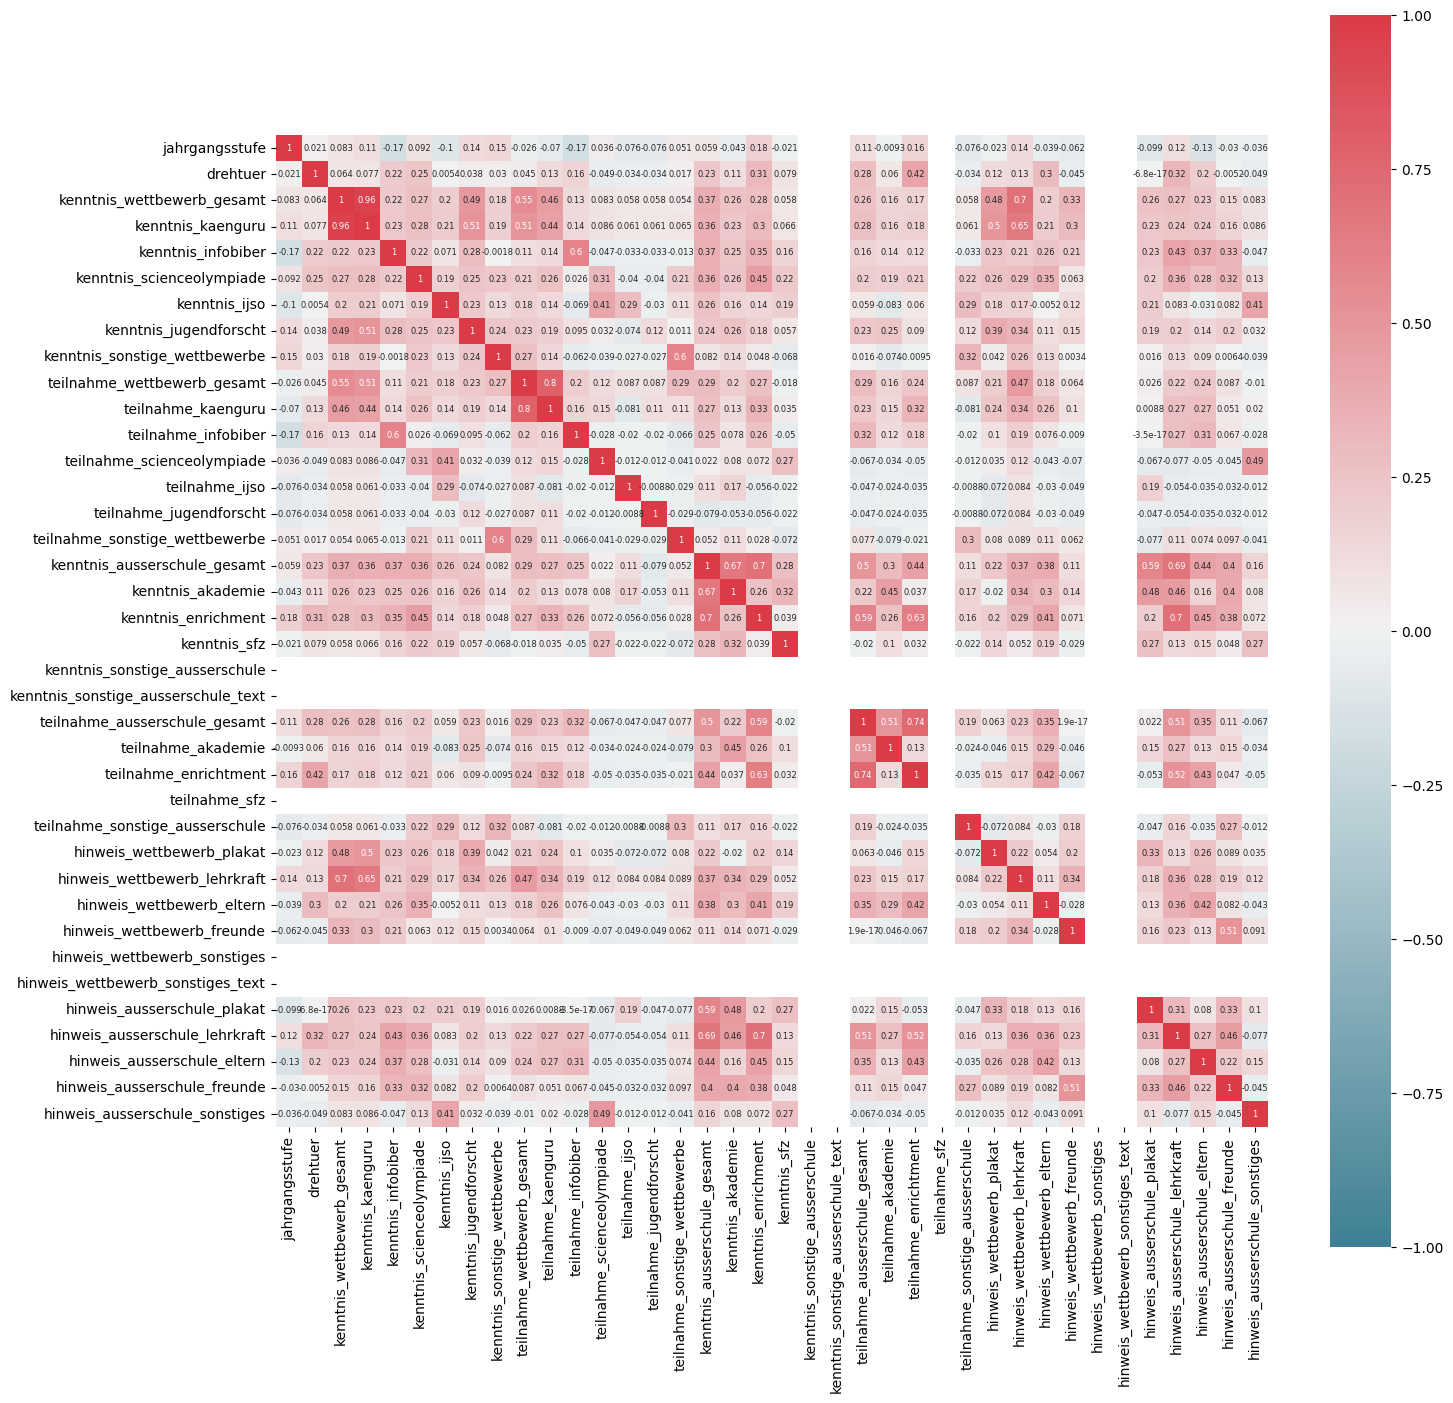

In [9]:
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmatrix,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, 
    annot = True,annot_kws = {'size': 6})